In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## The NIPH data files.
https://github.com/folkehelseinstituttet/surveillance_data

In [2]:

# URL of the data files

#url="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_2022-03-18.xlsx"
url_msis_sexage="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_time_sex_age_latest.csv"
url_hosp="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_hospital_by_time_latest.csv"
url_lab="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_lab_by_time_latest.csv"
url_death="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_latest.csv"
url_demo="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_demographics_latest.csv"
url_msis_location="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_location_latest.csv"
url_vac="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_sysvak_by_time_location_latest.csv"
#url = "https://github.com/folkehelseinstituttet/surveillance_data/blob/67a2cb6ba56c10e78a296dfde7a9ceff185ae526/covid19/data_covid19_death_by_time_2022-03-18.xlsx"


In [3]:

# Read the cvs file from the URL
msis_sexage = pd.read_csv(url_msis_sexage)
msis_location = pd.read_csv(url_msis_location)

hosp = pd.read_csv(url_hosp)
lab=pd.read_csv(url_lab)
demo=pd.read_csv(url_demo)
death=pd.read_csv(url_death)
vac=pd.read_csv(url_vac)
# Change the dates to date_time
lab['date']=pd.to_datetime(lab.date)
death['date']=pd.to_datetime(death.date)
msis_location['date']=pd.to_datetime(msis_location.date)
msis_sexage['date']=pd.to_datetime(msis_sexage.date)
demo['date']=pd.to_datetime(demo.date)
hosp['date']=pd.to_datetime(hosp.date)
vac['date']=pd.to_datetime(vac.date)

Let us check the frequency of the data. We notice that all are on daily basis, apart from _death_ and _msis_sexage_ that are weekly numbers. 

In [4]:

print('lab dT: ' + str(lab.date[1]-lab.date[0]))
print('death dT: ' + str(death.date[1]-death.date[0]))
print('msis_sexage dT: ' + str((msis_sexage.date.unique()[1]-msis_sexage.date.unique()[0]).astype('timedelta64[D]')))
print('demo dT: ' + str((demo.date[1]-demo.date[0])))
print('hosp dT: ' + str(hosp.date[1]-hosp.date[0]))
print('vac dT: ' + str(vac.date[1]-vac.date[0]))


lab dT: 1 days 00:00:00
death dT: 7 days 00:00:00
msis_sexage dT: 7 days
demo dT: 0 days 00:00:00
hosp dT: 1 days 00:00:00
vac dT: 1 days 00:00:00


### Extract some data
We take the national numbers, from the vaccination data and drop most of the columns. 
From the lab data we keep only the date and the negative and positive results. 

In [6]:
vac=vac[['date', 'n_dose_1',
       'n_dose_2', 'n_dose_3', 'n_dose_4', 'cum_n_dose_1', 'cum_n_dose_2',
       'cum_n_dose_3', 'cum_n_dose_4', 'cum_pr100_dose_1', 'cum_pr100_dose_2',
       'cum_pr100_dose_3', 'cum_pr100_dose_4', 'pop', 'location_name']].set_index('date')
vac

,n_dose_1,n_dose_2,n_dose_3,n_dose_4,cum_n_dose_1,cum_n_dose_2,cum_n_dose_3,cum_n_dose_4,cum_pr100_dose_1,cum_pr100_dose_2,cum_pr100_dose_3,cum_pr100_dose_4,pop,location_name
date,,,,,,,,,,,,,,
2020-12-02,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-03,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-04,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-05,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-06,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,43,59,419,5799.0,4346936,4054643,3005480,729702.0,80.1,74.7,55.4,13.5,5425270,Norge
2022-11-10,42,58,399,5385.0,4346978,4054701,3005879,735087.0,80.1,74.7,55.4,13.5,5425270,Norge
2022-11-11,16,25,211,2596.0,4346994,4054726,3006090,737683.0,80.1,74.7,55.4,13.6,5425270,Norge


In [7]:
tmp=vac.where(vac['location_name']=='Norge').dropna().copy()

#tmp.drop(columns=[tmp.columns[i] for i in range(11)], inplace=True)
lab_hosp=lab[['date','n_neg','n_pos']].set_index('date')
lab_hosp=lab_hosp.join(tmp)
tmp=hosp[['date','n_icu','n_hospital_main_cause']].set_index('date')
lab_hosp=lab_hosp.join(tmp)
lab_hosp=lab_hosp.drop(columns=['location_name'])

lab_hosp

,n_neg,n_pos,n_dose_1,n_dose_2,n_dose_3,n_dose_4,cum_n_dose_1,cum_n_dose_2,cum_n_dose_3,cum_n_dose_4,cum_pr100_dose_1,cum_pr100_dose_2,cum_pr100_dose_3,cum_pr100_dose_4,pop,n_icu,n_hospital_main_cause
date,,,,,,,,,,,,,,,,,
2020-04-01,3736,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,27
2020-04-02,3361,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,37
2020-04-03,3394,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,21
2020-04-04,1301,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,27
2020-04-05,1048,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,978,150,43.0,59.0,419.0,5799.0,4346936.0,4054643.0,3005480.0,729702.0,80.1,74.7,55.4,13.5,5425270.0,0,15
2022-11-10,859,118,42.0,58.0,399.0,5385.0,4346978.0,4054701.0,3005879.0,735087.0,80.1,74.7,55.4,13.5,5425270.0,1,10
2022-11-11,589,96,16.0,25.0,211.0,2596.0,4346994.0,4054726.0,3006090.0,737683.0,80.1,74.7,55.4,13.6,5425270.0,1,1


/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_16209/3161487503.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  death.groupby('date').sum().n.plot(marker='o',ax=axs[1])


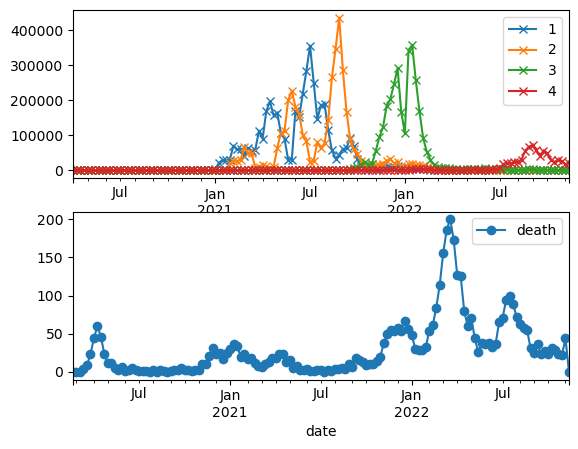

In [40]:
fig, axs = plt.subplots(2,1)
lab_hosp.resample('W').sum().n_dose_1.plot(marker='x',ax=axs[0])
lab_hosp.resample('W').sum().n_dose_2.plot(marker='x',ax=axs[0])
lab_hosp.resample('W').sum().n_dose_3.plot(marker='x',ax=axs[0])
lab_hosp.resample('W').sum().n_dose_4.plot(marker='x',ax=axs[0])
#lab_hosp.resample('W').sum().n_pos.plot(marker='x',ax=axs[0])
#lab_hosp.resample('W').sum().n_neg.plot(marker='d',ax=axs[0])
axs[0].legend(['1','2','3','4','pos','neg'])
plt.subplots_adjust(wspace=1.6)
death.groupby('date').sum().n.plot(marker='o',ax=axs[1])
plt.legend(['death']);

plt.show()


## MSIS
These files contain the total number of reported COVID-19 cases for Norway, the counties of Norway, and the municipalities of Norway.


In [10]:
msis_sexage.head()

,granularity_time,granularity_geo,location_code,border,age,sex,year,week,yrwk,season,x,date,n,date_of_publishing
0,week,nation,norge,2020,0-9,female,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
1,week,nation,norge,2020,0-9,male,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
2,week,nation,norge,2020,10-19,female,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
3,week,nation,norge,2020,10-19,male,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
4,week,nation,norge,2020,20-29,female,2020,8,2020-08,2019/2020,31.0,2020-02-23,1,2022-11-14


<Axes: xlabel='date', ylabel='n'>

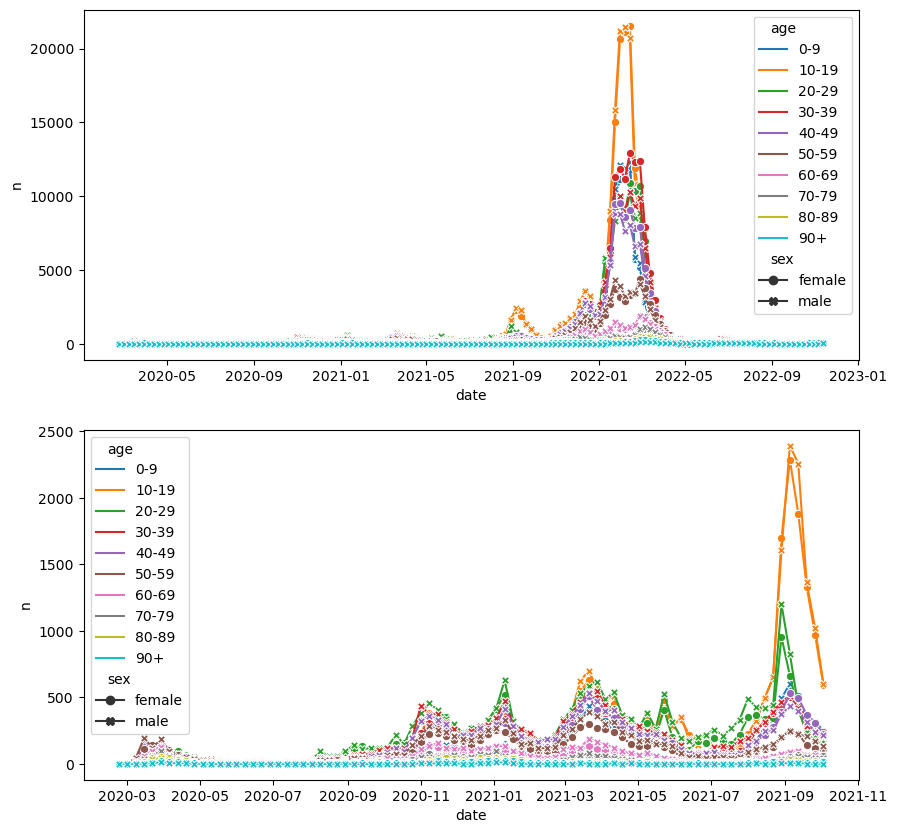

In [11]:
fig,axs=plt.subplots(2,1,figsize=(10,10))
sns.lineplot(data=msis_sexage,x=msis_sexage.date,y='n', hue='age', style='sex',markers=True, dashes=False,ax=axs[0])
sns.lineplot(data=msis_sexage[:1700],x=msis_sexage.date,y='n', hue='age', style='sex',markers=True, dashes=False,ax=axs[1])

Save the total cases to a file for future references. 

In [325]:
msis_sexage.groupby('date').sum().n.to_csv('cases.csv')

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_16098/1744811676.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msis_sexage.groupby('date').sum().n.to_csv('cases.csv')


### Tests and hospitals


In [41]:
lab.head()

,granularity_time,granularity_geo,location_code,border,age,sex,year,week,yrwk,season,x,date,n_neg,n_pos,pr100_pos,date_of_publishing
0,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-01,3736,198,5.0,2022-11-14
1,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-02,3361,198,5.6,2022-11-14
2,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-03,3394,164,4.6,2022-11-14
3,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-04,1301,88,6.3,2022-11-14
4,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-05,1048,72,6.4,2022-11-14


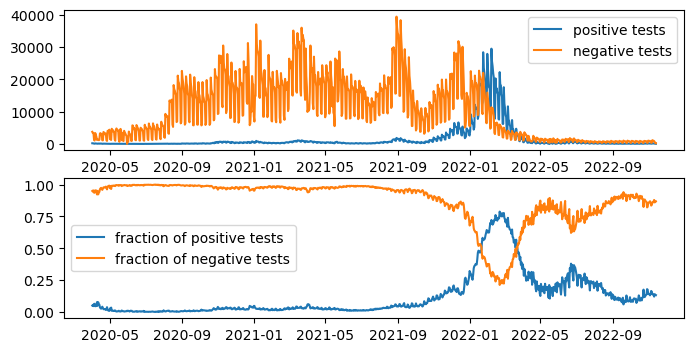

In [42]:
fig,axs=plt.subplots(2,1,figsize=(8,4))
axs[0].plot(pd.to_datetime(lab.date),lab.n_pos,pd.to_datetime(lab.date),lab.n_neg)
axs[0].legend(['positive tests','negative tests'])
axs[1].plot(pd.to_datetime(lab.date),lab.n_pos/(lab.n_pos+lab.n_neg),pd.to_datetime(lab.date),lab.n_neg/(lab.n_pos+lab.n_neg))
axs[1].legend(['fraction of positive tests','fraction of negative tests'])


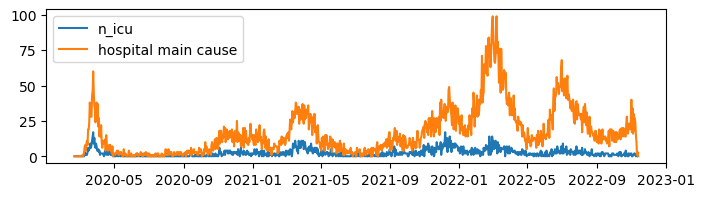

In [43]:
fig,axs=plt.subplots(1,1,figsize=(8,2))
plt.plot(pd.to_datetime(hosp.date),hosp.n_icu,pd.to_datetime(hosp.date),hosp.n_hospital_main_cause)
plt.legend(['n_icu','hospital main cause'])

## Vaccination

set the index to date for easier plotting.

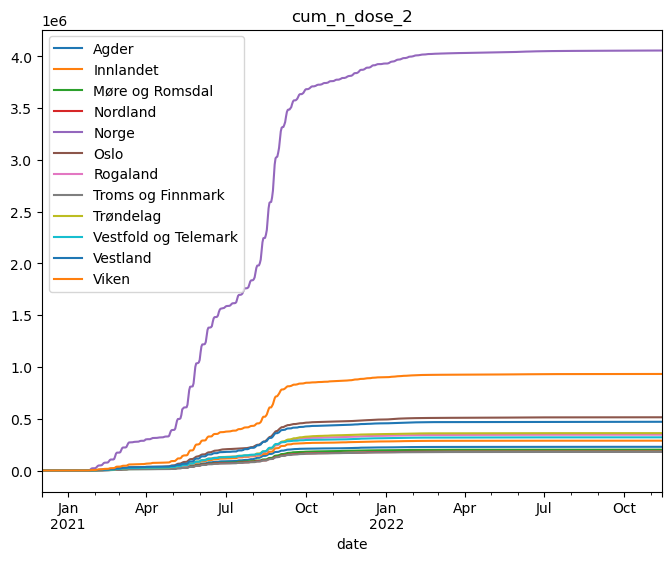

In [52]:
variable='cum_n_dose_2'
fig,axs=plt.subplots(1,1,figsize=(8,6))

vac.groupby('location_name')[variable].plot(legend=True,title=variable, ax=axs);

Is this the right way to present the data?

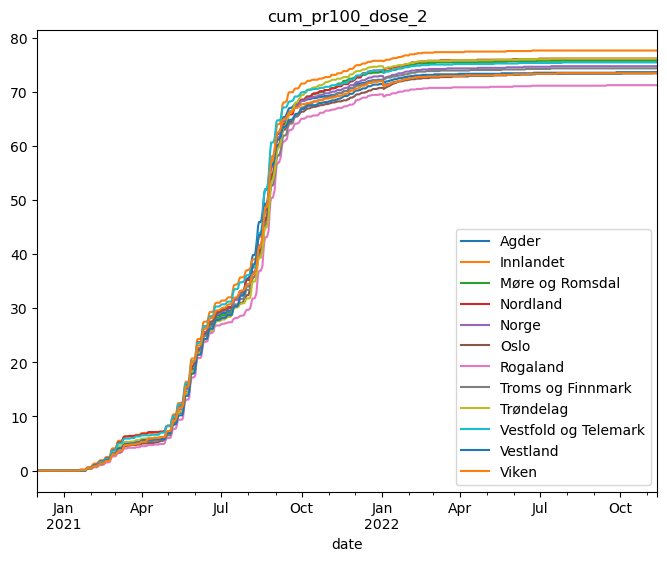

In [76]:
variable='cum_pr100_dose_2'
fig,axs=plt.subplots(1,1,figsize=(8,6))

vac.groupby('location_name')[variable].plot(legend=True,title=variable, ax=axs);

In [75]:
vac

,n_dose_1,n_dose_2,n_dose_3,n_dose_4,cum_n_dose_1,cum_n_dose_2,cum_n_dose_3,cum_n_dose_4,cum_pr100_dose_1,cum_pr100_dose_2,cum_pr100_dose_3,cum_pr100_dose_4,pop,location_name
date,,,,,,,,,,,,,,
2020-12-02,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-03,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-04,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-05,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-06,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,43,59,419,5799.0,4346936,4054643,3005480,729702.0,80.1,74.7,55.4,13.5,5425270,Norge
2022-11-10,42,58,399,5385.0,4346978,4054701,3005879,735087.0,80.1,74.7,55.4,13.5,5425270,Norge
2022-11-11,16,25,211,2596.0,4346994,4054726,3006090,737683.0,80.1,74.7,55.4,13.6,5425270,Norge


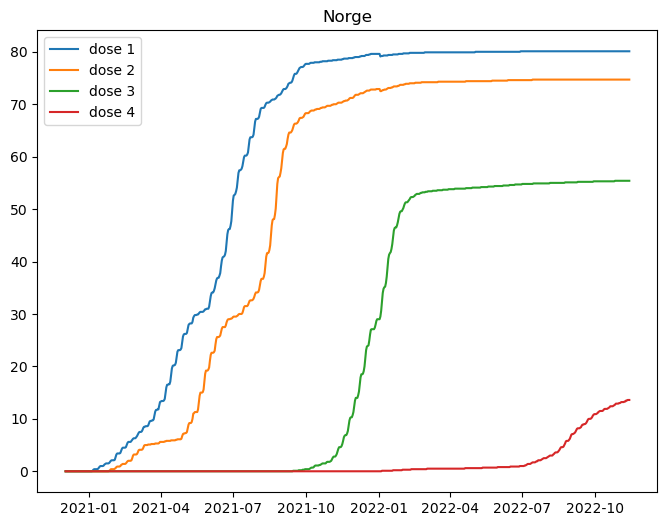

In [82]:
tmp=vac.where(vac['location_name']=='Norge').dropna()
fig,axs=plt.subplots(1,1,figsize=(8,6))
plt.plot(tmp['cum_pr100_dose_1'])
plt.plot(tmp['cum_pr100_dose_2'])
plt.plot(tmp['cum_pr100_dose_3'])
plt.plot(tmp['cum_pr100_dose_4'])
plt.legend(['dose 1','dose 2','dose 3','dose 4'])
plt.title('Norge');

## Estimate the R number

In [18]:
msis_sexage.groupby('date').sum().n

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_16209/2184507674.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msis_sexage.groupby('date').sum().n


date
2020-02-23       1
2020-03-01      30
2020-03-08     217
2020-03-15    1215
2020-03-22    1438
              ... 
2022-10-16     499
2022-10-23     561
2022-10-30     780
2022-11-06     879
2022-11-13     786
Name: n, Length: 143, dtype: int64

In [22]:
import numpy as np
import pandas as pd

def estimate_R(incidence, serial_interval):
    """
    Estimate the time-varying reproduction number R_t.
    
    Parameters:
    incidence (list): List of new cases per time unit.
    serial_interval (list): List of probabilities for the serial interval distribution.
    
    Returns:
    R_t (list): Estimated reproduction number over time.
    """
    incidence = np.array(incidence)
    serial_interval = np.array(serial_interval)
    
    # Ensure the serial interval sums to 1
    serial_interval /= serial_interval.sum()
    
    # Calculate the effective reproduction number R_t
    R_t = []
    for t in range(1, len(incidence)):
        lambda_t = sum(incidence[t-i] * serial_interval[i] for i in range(1, min(t, len(serial_interval))))
        if lambda_t > 0:
            R_t.append(incidence[t] / lambda_t)
        else:
            R_t.append(np.nan)
    
    return R_t


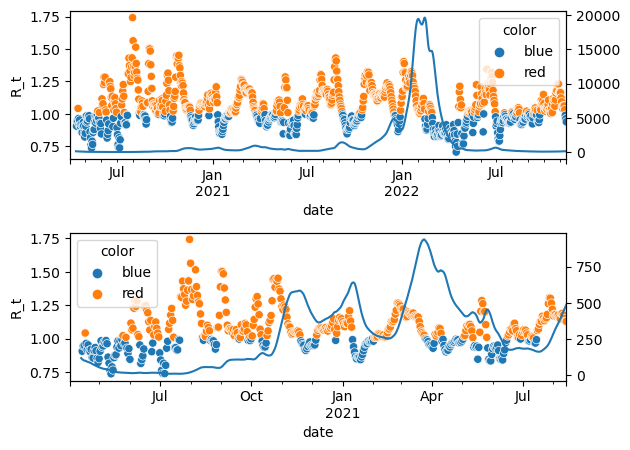

In [33]:

# Example incidence data (number of new cases per day)
incidence_data = lab_hosp.n_pos.rolling(window=7).mean()

# Example serial interval distribution
serial_interval = [0.04, 0.15, 0.25, 0.25, 0.15, 0.1, 0.05,0.01]

# Estimate R_t
R_t = estimate_R(incidence_data, serial_interval)

# Convert to a pandas DataFrame for better visualization
df = pd.DataFrame({'Day': range(1, len(R_t) + 1), 'R_t': R_t, 'n': incidence_data[1:]})

df['color'] = np.where(df['R_t'] > 1, 'red', 'blue')


fig,axs=plt.subplots(2,1)

sns.scatterplot(data=df, x=df.index, y=df.R_t, hue='color', ax=axs[0])
ax2=axs[0].twinx()
df.n.rolling(window=7).mean().plot(ax=ax2)

tmp=df[:500]
sns.scatterplot(data=tmp, x=tmp.index, y=tmp.R_t, hue='color', ax=axs[1])
ax2=axs[1].twinx()
tmp.n.rolling(window=7).mean().plot(ax=ax2)
plt.subplots_adjust(hspace=0.5) 

#event_date = pd.to_datetime('2021-07-15')
#plt.axvline(event_date, color='r', linestyle='--')

# Add text to the plot
#plt.text(event_date, 250, 'Event', color='r', ha='right')

#data.cases.plot()

In [38]:
R_est=incidence_data[1:].to_frame()
R_est['R_t']=R_t

R_est.dropna().to_csv('R_estimate.csv', index=True)